Name | Matr.Nr. | Due Date
:--- | ---: | ---:
Azat Vakhitov | 12148222 | 07.11.2022, 08:00

<h1 style="color:rgb(0,120,170)">Hands-on AI I</h1>
<h2 style="color:rgb(0,120,170)">Unit 2 &ndash; Reading, Handling and Visualization of Datasets</h2>

<b>Authors:</b> Brandstetter, Schäfl, Parada-Cabaleiro, Schörgenhumer<br>
<b>Date:</b> 24-10-2022

This file is part of the "Hands-on AI I" lecture material. The following copyright statement applies to all code within this file.

<b>Copyright statement:</b><br>
This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h3 style="color:rgb(0,120,170)">How to use this notebook</h3>

This notebook is designed to run from start to finish. There are different tasks (displayed in <span style="color:rgb(248,138,36)">orange boxes</span>) which require your contribution (in form of code, plain text, ...). Most/All of the supplied functions are imported from the file <code>u2_utils.py</code> which can be seen and treated as a black box. However, for further understanding, you can look at the implementations of the helper functions. In order to run this notebook, the packages which are imported at the beginning of <code>u2_utils.py</code> need to be installed.

In [1]:
# Required packages and the u2_utils file
import u2_utils as u2
import IPython.display as ipd
import numpy as np
import spacy
from matplotlib.image import imread

u2.check_module_versions()

Installed Python version: 3.9 (✓)
Installed numpy version: 1.21.5 (✓)
Installed pandas version: 1.4.2 (✓)
Installed scikit-learn version: 1.0.2 (✓)
Installed matplotlib version: 3.5.1 (✓)
Installed seaborn version: 0.11.2 (✓)
Installed scipy version: 1.7.3 (✓)
Installed spacy version: 3.4.2 (✓)


<h2>Exercise 1</h2>

<div class="alert alert-warning">
    <b>Exercise 1.1. [5 Points]</b>
    <ul>
        <li>Plot the image of a tulip named <code>flower.jpg</code> (you will find this image in the folder <code>resources</code>).</li>
    </ul>
</div>

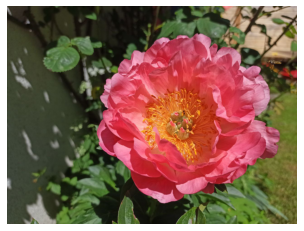

In [2]:
image_path = "resources/flower.jpg"
# plot image
u2.plot_image(image_path)



<div class="alert alert-warning">
    <b>Exercise 1.2. [5 Points]</b>
    <ul>
        <li>Load the image and print its dimensions (you will see that height and length/width are different to those from the image used in the lecture notebook).</li>
    </ul>
</div>

In [3]:
# load image and print its dimensions
img = imread(image_path)
print(img.shape)

(961, 1280, 3)


<h2>Exercise 2</h2>

By using the functions from `u2_utils.py` and working with the flower image, perform the tasks below:

<div class="alert alert-warning">
    <b>Exercise 2.1. [3 Points]</b>
    <ul>
        <li>Plot the image with $\alpha = 60\%$.</li>
    </ul>
</div>

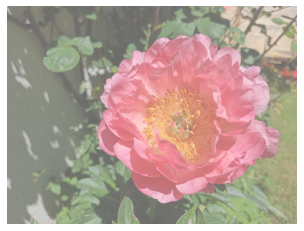

In [4]:
u2.plot_image_rgba(image_path, alpha=0.6)

<div class="alert alert-warning">
    <b>Exercise 2.2. [3 Points]</b>
    <ul>
        <li>Plot the image by cropping it so that the flower is in the center of the (cropped) image and the distances to the borders are roughly equal.</li>
    </ul>
</div>

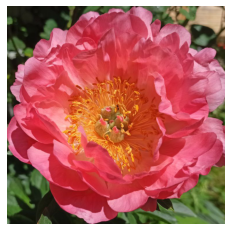

In [5]:
u2.plot_cropped_image(image_path, left=400, top=120, width=750, height=750)

<div class="alert alert-warning">
    <b>Exercise 2.3. [5 Points]</b>
    <ul>
        <li>Plot the image channels as well as the histograms for each color channel in the image.</li>
    </ul>
</div>

Minimum:   0
Maximum: 236


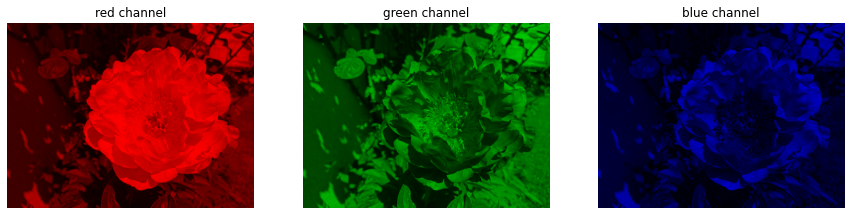

In [6]:
channel = 2

img = imread(image_path)
print(f"Minimum: {np.min(img[:,:,channel]):>3}")
print(f"Maximum: {np.max(img[:,:,channel]):>3}")
u2.plot_image_channels_rgb(image_path)

<div class="alert alert-warning">
    <b>Exercise 2.4. [5 Points]</b>
    <ul>
        <li>Try to find good <b>color threshold</b> values to segment the image so the flower is separated from the background.</li>
        <li>Note: The result does not need to be precise.</li>
    </ul>
</div>

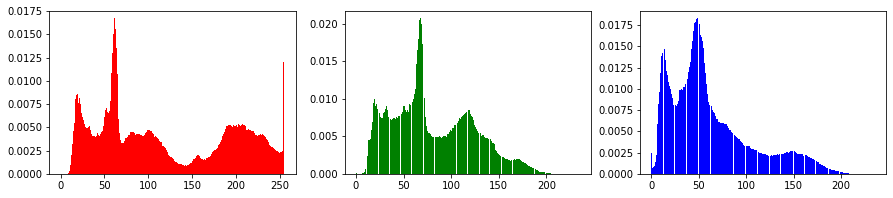

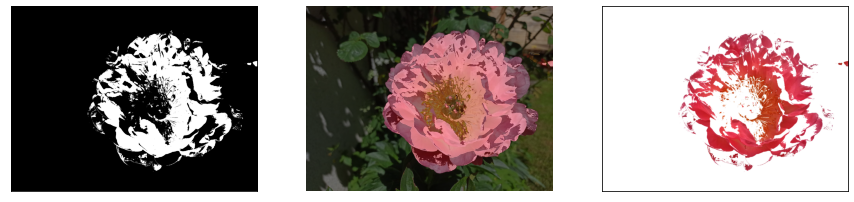

In [24]:
u2.plot_color_histograms(image_path)
# segment image with the thresholds for red channel, green channel and blue channel
u2.segment_image(image_path, lower_threshold_r=160, upper_threshold_g=80)

<h2>Exercise 3</h2>

With the functions from the file `u2_utils.py`, as shown in the lecture notebook, perform the tasks below:

<div class="alert alert-warning">
    <b>Exercise 3.1. [10 Points]</b>
    <ul>
        <li>Generate three sine waves (all of them with a duration of 1.2 second, at a sampling rate of 28000 Hz) with the following frequencies: 440 Hz, 554.37 Hz and 659.25 Hz (in music terms, this is called an A major chord, here with the notes A4, C#5 and E5).</li>
        <li>Then, add them together into a complex sound, plot the wave with <code>u2.plot_wave(...)</code> and generate a player to listen to it.</li>
    </ul>
</div>

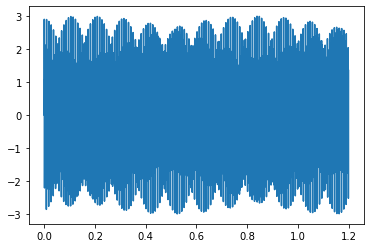

In [20]:

T  = 1.2  # length of sound signal
sampling_rate = 28000  # sampling rate

# create sine wave
points_of_wave_1 = u2.generate_wave(440, T, sampling_rate)
points_of_wave_2 = u2.generate_wave(554.37, T, sampling_rate)
points_of_wave_3 = u2.generate_wave(659.25, T, sampling_rate)

# add the waves thogether
added_points_of_wave = points_of_wave_1 + points_of_wave_2 + points_of_wave_3

# plot the wave and create player to listen to tone
u2.plot_wave(added_points_of_wave, T, sampling_rate)
ipd.Audio(added_points_of_wave, rate=sampling_rate)

<div class="alert alert-warning">
    <b>Exercise 3.2. [5 Points]</b>
    <ul>
        <li>Use the <code>u2.apply_fourier_transform(...)</code> function to apply the discrete Fourier transform (DFT) to this complex sound and plot the output, i.e., decompose the complex sound into the original sine waves. Choose a meaningful maximum frequency when plotting the spectrum.</li>
    </ul>
</div>

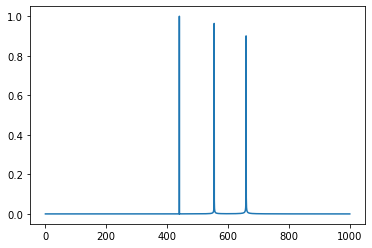

In [9]:
ft_added_points = u2.apply_fourier_transform(added_points_of_wave)
u2.plot_spectrum(ft_added_points, sampling_rate, max_freq=1000)

<h2>Exercise 4</h2>

By using the functions `u2.read_wav_file(...)` and `u2.apply_fourier_transform(...)` from `u2_utils.py`, perform the task below:

<div class="alert alert-warning">
    <b>Exercise 4.1. [10 Points]</b>
    <ul>
        <li>Read the audio file named <code>audio.wav</code> from the <code>resources</code> folder.</li>
        <li>Apply Fourier analysis and plot the resulting spectrum.</li>
    </ul>
</div>

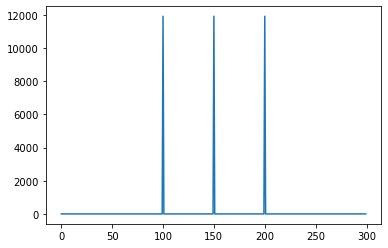

In [10]:
sound_path = "resources/audio.wav"
points_audio, sampling_rate_piano = u2.read_wav_file(sound_path, time=T)
ft_points_audio = u2.apply_fourier_transform(points_audio)
u2.plot_spectrum(ft_points_audio, sampling_rate_piano, max_freq=300)

<div class="alert alert-warning">
    <b>Exercise 4.2. [5 Points]</b>
    <ul>
        <li>Identify the frequencys of the three hidden sine waves.</li>
        <li>Hint: Adapt <code>max_freq</code> from the <code>u2.plot_spectrum(...)</code> function above.</li>
    </ul>
</div>

first frequencie = 100, second frequency = 150, third frequency = 200

<h2>Exercise 5</h2>

<div class="alert alert-warning">
    <b>Exercise 5.1. [5 Points]</b>
    <ul>
        <li>Download the word embedding model and load it by using the <code>spacy</code> library.</li>
    </ul>
</div>

In [3]:
!python -m spacy download en_core_web_md

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_md-3.4.1/en_core_web_md-3.4.1-py3-none-any.whl (42.8 MB)
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


<div class="alert alert-warning">
    <b>Exercise 5.2. [10 Points]</b>
    <ul>
        <li>Evaluate which two words have a higher similarity: "exercise" and "fitness" or "candy" and "fitness".</li>
        <li>Then, print out the result.</li>
        <li>Hint: You could use an if-else statement to make the comparison (feel free to investigate this option on the Internet). Otherwise, simply evaluate both similarities manually and print the higher one.</li>
    </ul>
</div>

In [12]:
word_embedding_english = spacy.load('en_core_web_md')
exercise = word_embedding_english('exercise')
fitness = word_embedding_english('fitness')
candy = word_embedding_english('candy')
if(exercise.similarity(fitness) > candy.similarity(fitness)):
    print(f"The word exercise has higher simmilarity: {exercise.similarity(fitness)}")
else:
    print(f"The word candy has higher simmilarity: {candy.similarity(fitness)}")

The word exercise has higher simmilarity: 0.6519134202310216


<h2>Exercise 6</h2>

With the functions from the file `u2_utils.py`, including `u2.apply_tsne(...)`, i.e., the function to apply the t-SNE algorithm for dimensionality reduction already described in the first lecture, perform the tasks below:

<div class="alert alert-warning">
    <b>Exercise 6.1. [5 Points]</b>
    <ul>
        <li>Following the example given in the lecture notebook, create a list containing these words: "exercise", "fitness", "gym", "lifting", "weights", "squat", "candy", "chocolate", "gummi bears", "sugar", "sweet", "cake", "star", "night", "sky", "moon", "dark", "cold", "wind".</li>
        <li>Hint: A list can be created with <code>my_list = [...]</code>, where <code>...</code> is the content.</li>
    </ul>
</div>

In [13]:
example_words = ["exercise", "fitness", "gym", "lifting", "weights", "squat", "candy", "chocolate", "gummi bears", "sugar", "sweet", "cake", "star", "night", "sky", "moon", "dark", "cold", "wind"]

<div class="alert alert-warning">
    <b>Exercise 6.2. [5 Points]</b>
    <ul>
        <li>Get the embeddings of the words and display the result data frame.</li>
    </ul>
</div>

In [14]:
# get embedding vectors for list of words
df_embeddings = u2.get_word_vectors(word_embedding_english, example_words)
df_embeddings

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
exercise,0.10294,2.404100,-3.67800,0.629330,1.18930,0.640920,-0.162890,1.177900,-4.23460,-0.951250,...,2.23000,-0.28226,1.575900,-0.327840,-1.549900,2.540900,0.22260,-2.672100,-4.03910,1.364100
fitness,3.70780,2.510700,-3.08450,1.340300,2.95120,-1.444200,0.081905,4.934400,-0.67110,-3.746500,...,-1.16350,-2.60530,-1.438300,-0.899940,-0.583280,-1.500800,0.13483,-1.613100,-3.21150,3.925200
gym,4.60040,3.562000,-0.17496,1.345700,-1.39680,-0.766280,-2.544500,-2.018800,1.39250,-0.877110,...,-5.72770,-0.54251,0.036649,-1.602800,-3.212500,0.457040,-6.28940,0.468320,-2.06810,-1.463500
lifting,1.45460,0.808330,-2.84970,4.035200,1.01070,-1.299200,-0.046936,5.456100,-1.36220,1.565600,...,-1.65960,0.91960,1.048700,-0.371400,-1.795300,0.487120,2.23780,-3.610200,-2.68510,-0.553810
weights,-1.77410,1.819800,-2.78550,7.870300,2.37580,-1.702100,-2.374200,5.565400,-1.73810,-1.245300,...,-2.10440,0.39955,2.801000,0.177410,-2.136600,-0.254500,1.49170,-3.461800,-1.48840,-1.918900
squat,2.43760,4.331100,-3.04700,2.901100,0.48204,3.688300,-5.392300,4.256800,-2.00520,2.806800,...,4.92210,0.40821,1.718600,-1.616400,-1.353100,2.216600,1.37030,-2.808000,-2.27430,-0.047475
candy,-1.46080,-1.200600,-5.19130,3.935000,-0.93009,-4.535100,-0.515170,0.493520,-5.25380,0.563350,...,-2.22070,-1.35580,-0.014769,0.096918,-3.106400,-0.105280,0.76429,2.614400,-0.27158,-0.696060
chocolate,-0.75251,-3.348000,-2.92930,3.677300,0.67698,-4.622100,1.747100,2.907200,-1.12180,1.905000,...,-0.42257,-1.59170,-1.155700,-2.813800,-2.955400,0.737690,1.83210,3.337100,-0.14004,1.398000
gummi bears,1.39535,1.437045,-6.25565,2.117900,1.68900,-3.325150,0.672505,-1.042350,0.33480,3.710984,...,-0.93790,-2.80095,4.152400,-3.038800,-4.616675,4.685815,2.07410,-1.976175,-2.63014,0.520950
sugar,2.43350,-2.447600,-1.44910,3.883100,1.47290,-6.940300,0.414770,2.256100,-3.91200,0.688960,...,0.98520,-5.19900,1.764200,-4.675600,-1.501200,-0.263730,5.02320,2.232400,-1.82080,-0.528310


<div class="alert alert-warning">
    <b>Exercise 6.3. [7 Points]</b>
    <ul>
        <li>Down-project the 300-dimensional representation of each word to 2 dimensions by applying the t-SNE method, i.e., the function <code>u2.apply_tsne(...)</code>.</li>
        <li>Then, plot it in a 2D representation by using the function <code>u2.plot_word_embeddings_2d(...)</code>.</li>
        <li>Look for a fitting <code>perplexity</code> value in order to group the words into meaningful clusters.</li>
        <li>Note: Setting the seed for the random number generator <code>np.random.seed(seed=...)</code> is not necessary but useful if you want to ensure reproducible results.</li>
    </ul>
</div>

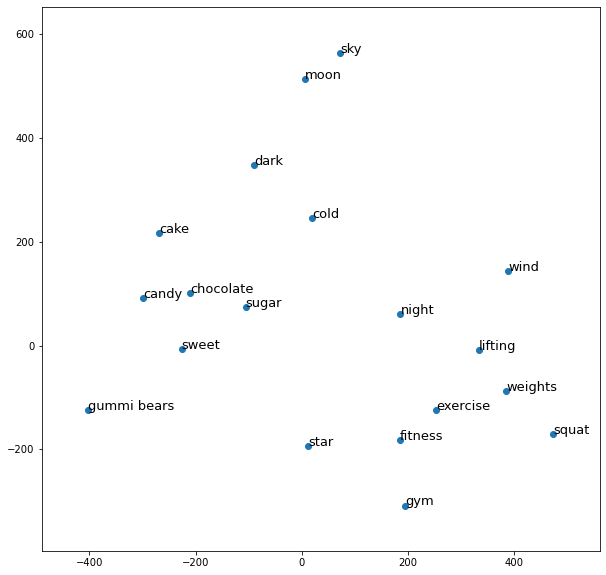

In [15]:
np.random.seed(seed=22)
embeddings_tsne_2d = u2.apply_tsne(n_components=2, data=df_embeddings, perplexity=4.0)
u2.plot_word_embeddings_2d(embeddings_tsne_2d)

<div class="alert alert-warning">
    <b>Exercise 6.4. [7 Points]</b>
    <ul>
        <li>Verify that the perplexity was correct by applying the PCA down-projection method and plotting the result in a 2D representation (this will clearly show the different clusters).</li>
    </ul>
</div>

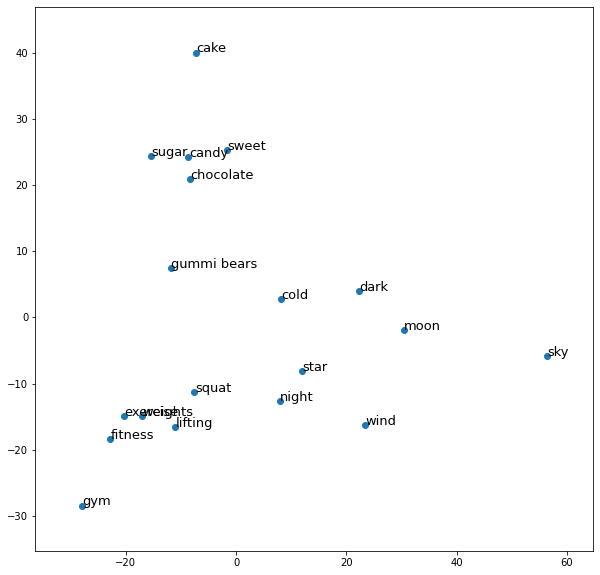

In [16]:
embeddings_pca_2d = u2.apply_pca(n_components=2, data=df_embeddings)
u2.plot_word_embeddings_2d(embeddings_pca_2d)

<div class="alert alert-warning">
    <b>Exercise 6.5. [5 Points]</b>
    <ul>
        <li>How many (main) clusters are there?</li>
    </ul>
</div>

I observe 3 main clusters. 1st cluster is related to environment("star", "night", "sky", "moon", "dark", "cold", "wind"), 2nd cluster is related to sweet food("candy", "chocolate", "gummi bears", "sugar", "sweet", "cake"), and third is related to sports("exercise", "fitness", "gym", "lifting", "weights", "squat")